<h1>Neural Network(Classification) </h1>


In [1]:
import numpy as np 
import pandas as pd 
import math
import zipfile
import scipy.optimize as op
import matplotlib.pyplot as plt
import cv2 as cv2
import tensorflow as tf

# Read Image Data from Zipped CSV
    
 There are 5000 training examples, where each training example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a ﬂoating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. Each of these training examples becomes a single row in our data matrix X. This gives us a 5000 by 400 matrix X where every row is a training example for a handwritten digit image.  
 
 
$X =    
\displaystyle \left[ \begin{matrix} 
— (x^{(1)})^T —\\ 
— (x^{(2)})^T —\\
. . . \\
— (x^{(m)})^T 
\end{matrix} \displaystyle \right]$
   
    

In [2]:
zf = zipfile.ZipFile('../input/DigitsDS/DigitsImageData.zip')
dfTrain = pd.read_csv(zf.open('DigitsImageData.csv'),header=None)   #Training Dataset
dfTrain.iloc[:,400]=dfTrain.iloc[:,400].replace(10,0)    #Replace 10 with 0
dfTrain.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [3]:
dfTrain.describe()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
count,5000.0,5000.0,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.0,5000.000000
mean,0.0,0.0,1.549060e-07,-0.000002,-0.000004,0.000117,0.000145,0.000080,0.000019,0.000044,...,0.000016,0.000122,0.000034,0.000006,0.000025,0.000009,0.000004,-4.121051e-07,0.0,4.500000
std,0.0,0.0,1.095351e-05,0.000108,0.000285,0.007398,0.007496,0.005057,0.003937,0.003653,...,0.005944,0.009318,0.008125,0.004369,0.004687,0.001564,0.000300,3.091390e-05,0.0,2.872569
min,0.0,0.0,0.000000e+00,-0.007163,-0.010297,-0.029396,-0.028706,-0.045485,-0.054957,-0.042550,...,-0.052807,-0.050588,-0.053324,-0.051814,-0.048580,-0.022029,-0.008572,-2.183926e-03,0.0,0.000000
25%,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,2.000000
50%,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,4.500000
75%,0.0,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,7.000000
max,0.0,0.0,7.745302e-04,0.000567,0.012817,0.506215,0.466290,0.254189,0.246560,0.237271,...,0.239926,0.351204,0.447564,0.204862,0.277293,0.075121,0.018903,8.510349e-05,0.0,9.000000


<h2>Extract Input Feature to <b>X </b>and Label to <b>Y</b></h2>
<h5>X=(X1 &amp; X2 in DS) and Y(Class in DS)   

In [4]:
def extractFeatures(df):
    df_Features=df.iloc[:,0:400]
    df_Label=df.iloc[:,400:401]
    X=df_Features.values
    Y=df_Label.values
    return X,Y

In [5]:
X,Y=extractFeatures(dfTrain)

##### Mnist Data can be downloaded using Tensorflow or Keras Library 

```
#Load Data

(X, Y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#Convert Dataset Same as above
X=np.transpose(X, (0,2,1))
X=X.reshape(60000,28*28)
Y=Y.reshape(60000,1)

#View Random Digit

plt.axis('off')
plt.imshow(X[21,:].reshape(28,28).T, cmap='Greys')
print(Y[21,:])

plt.show()

```

<h2> Visualize Image Data

<h5> View Random Single Image

[0]


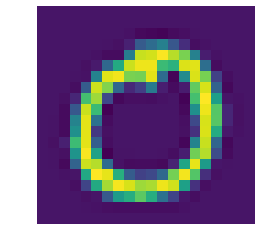

In [6]:
plt.axis('off')
plt.imshow(X[21,:].reshape(20,20).T)
#plt.imshow(X[21,:].reshape(28,28).T, cmap='Greys')
print(Y[21,:])

plt.show()

<h5> View Random Multiple Images

In [7]:
def displayImages(X, example_width=None):
    plt.close()
    plt.figure()
    if X.ndim == 1:
        X = np.reshape(X, (-1,X.shape[0]))
    if not example_width or not 'example_width' in locals():
        example_width = int(round(math.sqrt(X.shape[1])))
    plt.set_cmap("gray")
    m, n = X.shape
    example_height =int( n / example_width)
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m / display_rows))
    pad = 1
    display_array = -np.ones((pad + display_rows * (example_height + pad),  pad + display_cols * (example_width + pad)))
    curr_ex = 1
    for j in range(1,display_rows+1):
        for i in range (1,display_cols+1):
            if curr_ex > m:
                break
            max_val = max(abs(X[curr_ex-1, :]))
            rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
            cols = pad + (i - 1) * (example_width  + pad) + np.array(range(example_width ))			
            display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (example_height, example_width), order="F") / max_val
            curr_ex += 1
        if curr_ex > m:
            break
    h = plt.imshow(display_array)
    plt.axis('off')
    return h, display_array

Run the following Cell again to view Random Images in Training Data

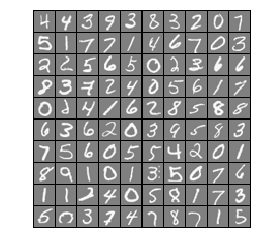

In [8]:
rand_indices = np.random.permutation(X.shape[0])
selectedImages = X[rand_indices[:100],:]
displayImages(selectedImages)
plt.show()

<h1>Training

In [9]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [10]:
def sigmoidGradient(z):
    g = 1.0 / (1.0 + np.exp(-z))
    g = g*(1-g)
    return g

In [11]:
def addBiasVector(X):
    r=np.column_stack((np.ones((X.shape[0],1)),X))
    return r

In [12]:
def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, hotY, lambda_reg):
    
    W1=nn_params[:hidden_layer_size * (input_layer_size + 1)]
    W1 =W1.reshape((hidden_layer_size, input_layer_size + 1))

    W2=nn_params[hidden_layer_size * (input_layer_size + 1):]
    W2 = W2.reshape((num_labels, hidden_layer_size + 1))

    dW1 = np.zeros( W1.shape )
    dW2 = np.zeros( W2.shape )
    m = len(X)   
      
    # forward Propagation
    #▔▔▔▔▔▔▔▔▔▔▔
    
    #GET Layer 1
    a1=X

    #GET Layer 2
    a1=addBiasVector(a1)
    z2=np.matmul(a1,np.transpose(W1))
    a2=sigmoid(z2)

    #GET LAYER 3
    a2=addBiasVector(a2)
    z3=np.matmul(a2,np.transpose(W2))
    a3=sigmoid(z3)

    
    #Layer3 is final Layer   
    h=a3
    
    
    cost= np.multiply(hotY,np.log(h)) +   np.multiply((1-hotY) , 1-h)
    J=-1/m*np.sum(np.sum(cost))
    

    # BACKPROPAGATION
    #▔▔▔▔▔▔▔▔▔▔▔

    #Layer 3
    err=np.subtract(h,hotY)
    dW2=(1/m)* np.matmul(err.T, a2)
  

    #Layer 2
    err=np.multiply(  np.matmul(err,W2), sigmoidGradient(addBiasVector(z2)))
                   
    err =  err[:,1:]
    dW1=(1/m)*np.matmul(err.T, a1)
    
    #Layer 1
    #Input Layer have no error
 

    
    # REGULARIZATION 
    #▔▔▔▔▔▔▔▔▔▔▔
    regularized_W2=np.column_stack((np.zeros((dW2.shape[0],1)), dW2[:,1:]))
    regularized_W1=np.column_stack((np.zeros((dW1.shape[0],1)), dW1[:,1:]))
   
   

 
    dW1 += (float(lambda_reg)/m)*regularized_W1
    dW2 += (float(lambda_reg)/m)*regularized_W2
   


    J = J + ( lambda_reg*(1/(2.0*m))*(np.sum(np.sum(regularized_W1**2))+
                                  np.sum(np.sum(regularized_W2**2))) )
    
    
    
    # Unroll gradients
    grad = np.column_stack((dW1.reshape(1,dW1.size), dW2.reshape(1,dW2.size)))
    grad=grad.flatten()

    return J, grad

<h5> Initialization

In [13]:
def randInitializeWeights(L_in, L_out):
    epsilon_init = 0.12
    W = np.random.rand(L_out, 1 + L_in)*(2*epsilon_init) - epsilon_init
    return W

In [14]:
input_layer_size  = X.shape[1]  #28*28
hidden_layer_size = 25 
iterations =20
lambda_reg = 0
num_labels = 10     
initial_W1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_W2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.column_stack((initial_W1.reshape(1,initial_W1.size),
                                     initial_W2.reshape(1,initial_W2.size)))
initial_nn_params=initial_nn_params.flatten()



<H5> One Hot Encoding to Y

In [15]:
#One Hot Encoding
m = len(X)           
# set y to be matrix of size m x k
hotY = np.zeros((m,num_labels))
# for every label, convert it into vector of 0s and a 1 in the appropriate position
for i in range(num_labels):
    selectedRows=np.where(Y==i)[0]
    hotY[selectedRows,i]=1.0 
print("hotY=",hotY[21,:])

hotY= [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<h5> Gradient Descent Updates

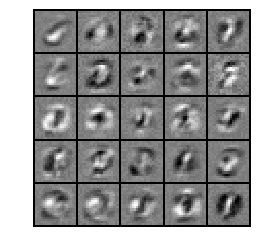

In [16]:
Result = op.minimize(fun =nnCostFunction, 
                     x0=initial_nn_params, 
                     args=(input_layer_size, hidden_layer_size, num_labels, X, hotY, lambda_reg), 
                     options={'disp': True, 'maxiter':iterations}, 
                     method="L-BFGS-B", jac=True)
nn_params = Result.x
W1=nn_params[:hidden_layer_size * (input_layer_size + 1)]
W2=nn_params[hidden_layer_size * (input_layer_size + 1):]
W1.shape = (hidden_layer_size, input_layer_size + 1)
W2.shape =  (num_labels, hidden_layer_size + 1)

displayImages(W1[:, 1:])
plt.show()

<h1> Prediction/Accuracy Evaluation

In [17]:
def predict(X,nn_params,input_layer_size, hidden_layer_size, num_labels):   
    W1=nn_params[:hidden_layer_size * (input_layer_size + 1)]
    W1 =W1.reshape((hidden_layer_size, input_layer_size + 1))

    W2=nn_params[hidden_layer_size * (input_layer_size + 1):]
    W2 = W2.reshape((num_labels, hidden_layer_size + 1))
    
    #forward Propagation
    #▔▔▔▔▔▔▔▔▔▔▔
    #GET Layer 1
    a1=X

    #GET Layer 2
    a1=addBiasVector(a1)
    z2=np.matmul(a1,np.transpose(W1))
    a2=sigmoid(z2)

    #GET LAYER 3
    a2=addBiasVector(a2)
    z3=np.matmul(a2,np.transpose(W2))
    a3=sigmoid(z3)

    PY=np.argmax(a3,axis=1) 
    PY=PY.reshape(len(PY),1)
    
    return PY


In [18]:
def accurracy(Y1,Y2):
    m=np.mean(np.where(Y1==Y2,1,0))    
    return m*100

<h5>Accurracy on Training Data

In [19]:
pY=predict(X,nn_params,input_layer_size, hidden_layer_size, num_labels) 
print(accurracy(Y, pY))

88.12


<h1>Test Image

<h2> Image Must match with Training data distribution.</h2>

<p>(1) Transformation to grayscale OR read image in grayscale
 <p>  (2) Resize Image to 20 X 20
 <p>  (3) Invert Colors if white background
 <p>  (4) Rescale Image Data Values to Data Values in Training Data  

In [20]:
#Read image in Grayscale
im = cv2.imread('../input/DigitsDS/DigitsImageTest.bmp',cv2.IMREAD_GRAYSCALE)

#Resize
im = cv2.resize(im  , (20 , 20))

<h2>How to Change Scale of $X[x_{min},x_{max}]$  to  $Y[y_{min},y_{max}]$</h2>

<p>Following is method to transforms/distributes values X into range of Y values  
    
<p>Get Min and Max of $X$
<p>$\hspace{20mm}CurMin=min(X)=x_{min}$
<p>$\hspace{20mm}CurMax=max(X)=x_{max}$

<p>But New Max and Min should be as per the $Y$

<p>$\hspace{20mm}NewMin=min(Y)=y_{min}$
<p>$\hspace{20mm}NewMax=max(Y)=y_{max}$

<p>$f(X)=y_{min} + (\dfrac{X - x_{min}}{x_{max} - x_{min}})  * (y_{max}-y_{min})$
     


In [21]:
testX=im.T.reshape(1,20*20)
testX=np.abs(testX-255.0)
#Cur Min Max
CurMin=np.min(testX)
CurMax=np.max(testX)
#Training Data New Min Max
NewMin=np.min(X)   #-0.1319632301985249
NewMax=np.max(X)   #1.127688299158888
testX  =NewMin+ ((testX -CurMin)/(CurMax-CurMin)) * ((NewMax-NewMin))

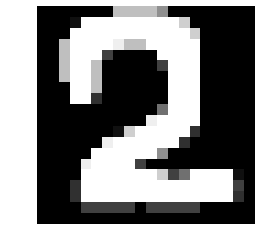

In [22]:
plt.axis('off')
plt.imshow(testX.reshape(20,20).T)
plt.show()

In [23]:
pY=predict(testX,nn_params,input_layer_size, hidden_layer_size, num_labels) 
print(pY)

[[2]]
